Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score , KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn import preprocessing

In [439]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (6).csv


In [440]:
df=pd.read_csv("Fraud_check (1).csv")

In [441]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [442]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [443]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [444]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [446]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [447]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

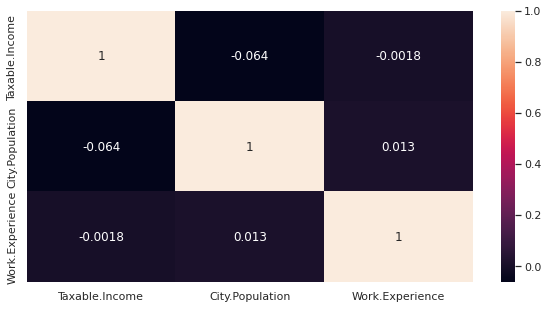

In [448]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)


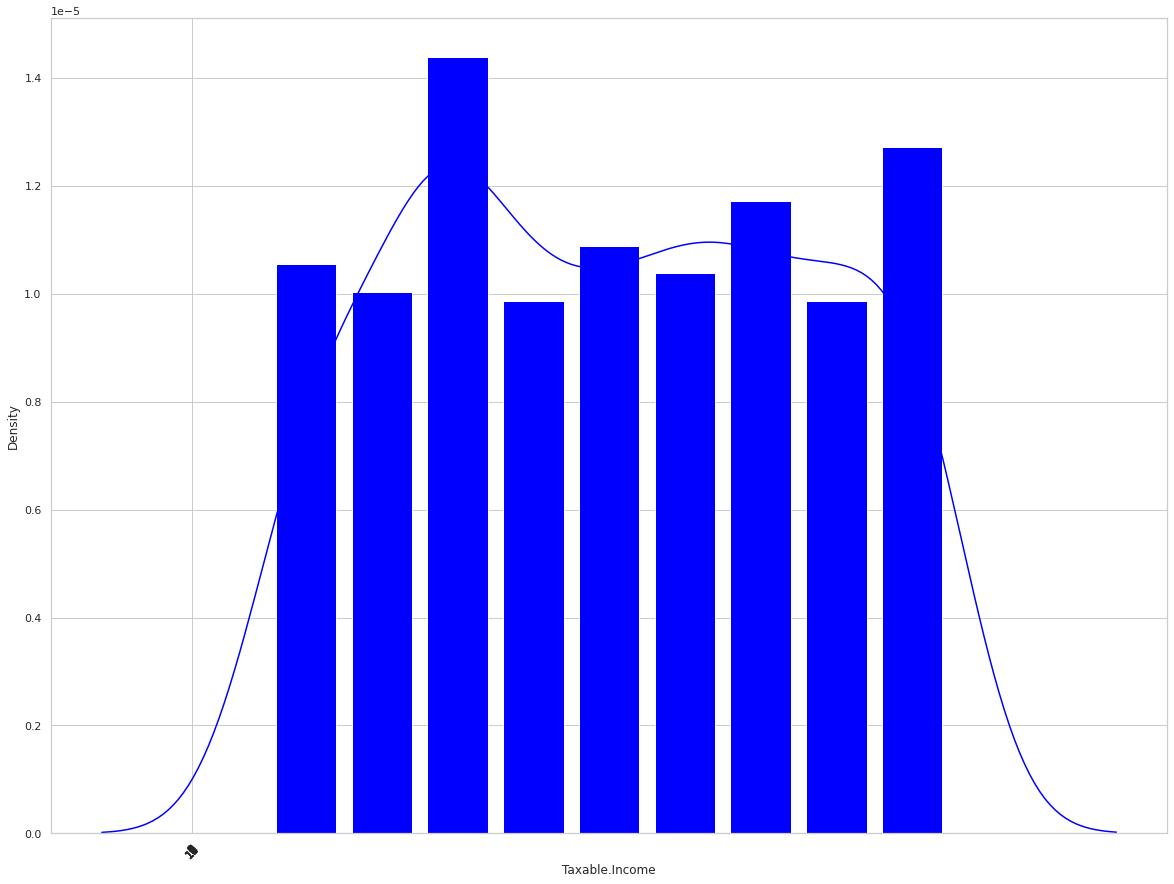

In [449]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()


     

distplot("Taxable.Income")


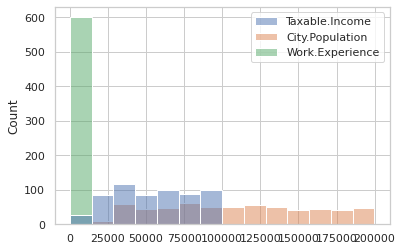

In [450]:
sns.histplot(df)


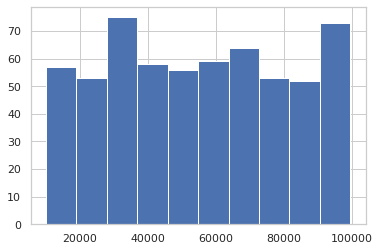

In [451]:
df["Taxable.Income"].hist()

In [452]:
df1 = df.rename({"Taxable.Income": "TI"},axis= 1)

In [453]:
df1

,Undergrad,Marital.Status,TI,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [454]:
df1.dtypes

Undergrad          object
Marital.Status     object
TI                  int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [455]:
df2=df.copy()
x = 0
for i in df2['Taxable.Income']:
    if i <= 30000:
        df2['Taxable.Income'][x] = 'Risky'
    else:
        df2['Taxable.Income'][x] = 'Good'
    x += 1
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [456]:
#converting the columns into proper dtypes

df2['Taxable.Income'] = df2['Taxable.Income'].astype("category")
df2['Undergrad'] = df2['Undergrad'].astype("category")
df2['Marital.Status'] = df2['Marital.Status'].astype("category")
df2['Urban'] = df2['Urban'].astype("category")

In [457]:
df2.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income     category
City.Population       int64
Work.Experience       int64
Urban              category
dtype: object

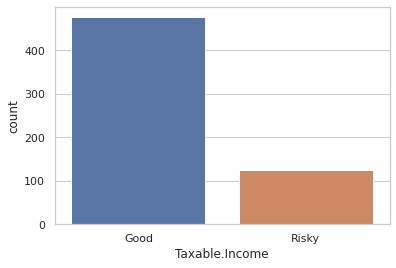

In [458]:
sns.countplot(df2['Taxable.Income'])

In [459]:
# Converting the categorical columns into labels by using label encoder

label_encoder = LabelEncoder()
df2['Taxable.Income'] = label_encoder.fit_transform(df2['Taxable.Income'])
df2['Undergrad'] = label_encoder.fit_transform(df2['Undergrad'])
df2['Marital.Status'] = label_encoder.fit_transform(df2['Marital.Status'])
df2['Urban'] = label_encoder.fit_transform(df2['Urban'])

In [460]:
df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [461]:
#Splitting the data in input and output
x=df2.iloc[:,0:5]
y=df2.iloc[:,5]

In [462]:
#Applying train test split on data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =42)

In [463]:
# Model building :
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)


from sklearn.ensemble import RandomForestClassifier as RF
model = RF(max_depth=2, random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [464]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [465]:
#prediction on train data
preds = model.predict(x_train)

In [466]:
accuracy=accuracy_score(y_train,preds)

In [467]:
accuracy*100

63.95833333333333

In [468]:
#prediction on test data
preds_t=model.predict(x_test)

In [469]:
#Accuracy
accuracy_test=accuracy_score(y_test,preds_t)
accuracy_test

0.48333333333333334

In [470]:
accuracy_test*100

48.333333333333336

In [471]:
forest = RandomForestClassifier(random_state = 42, n_estimators =100)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [472]:
#confusion_matrix
confusion = confusion_matrix(y_train,preds)
confusion

array([[156,  86],
       [ 87, 151]])

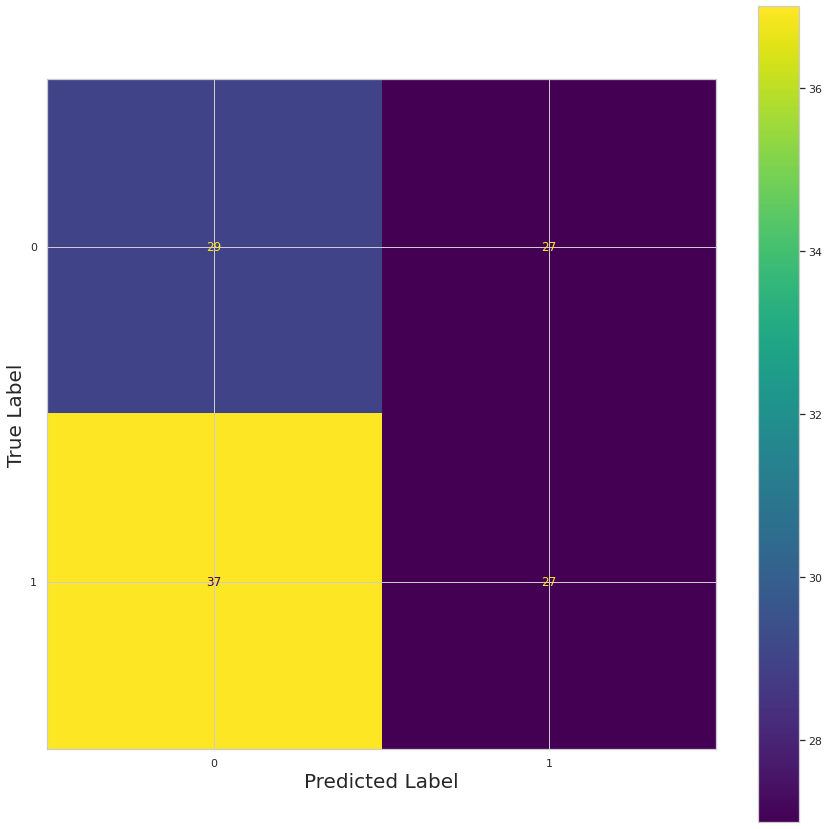

In [473]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(forest, x_test, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()

Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [474]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


     

import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [476]:
from google.colab import files
uploading=files.upload()

Saving Company_Data (1).csv to Company_Data (1) (4).csv


In [477]:
df3=pd.read_csv("Company_Data (1).csv")
df3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [478]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [479]:
df3.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [480]:
df3.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [481]:
df3.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [482]:
df3.shape

(400, 11)

<Figure size 1080x576 with 0 Axes>

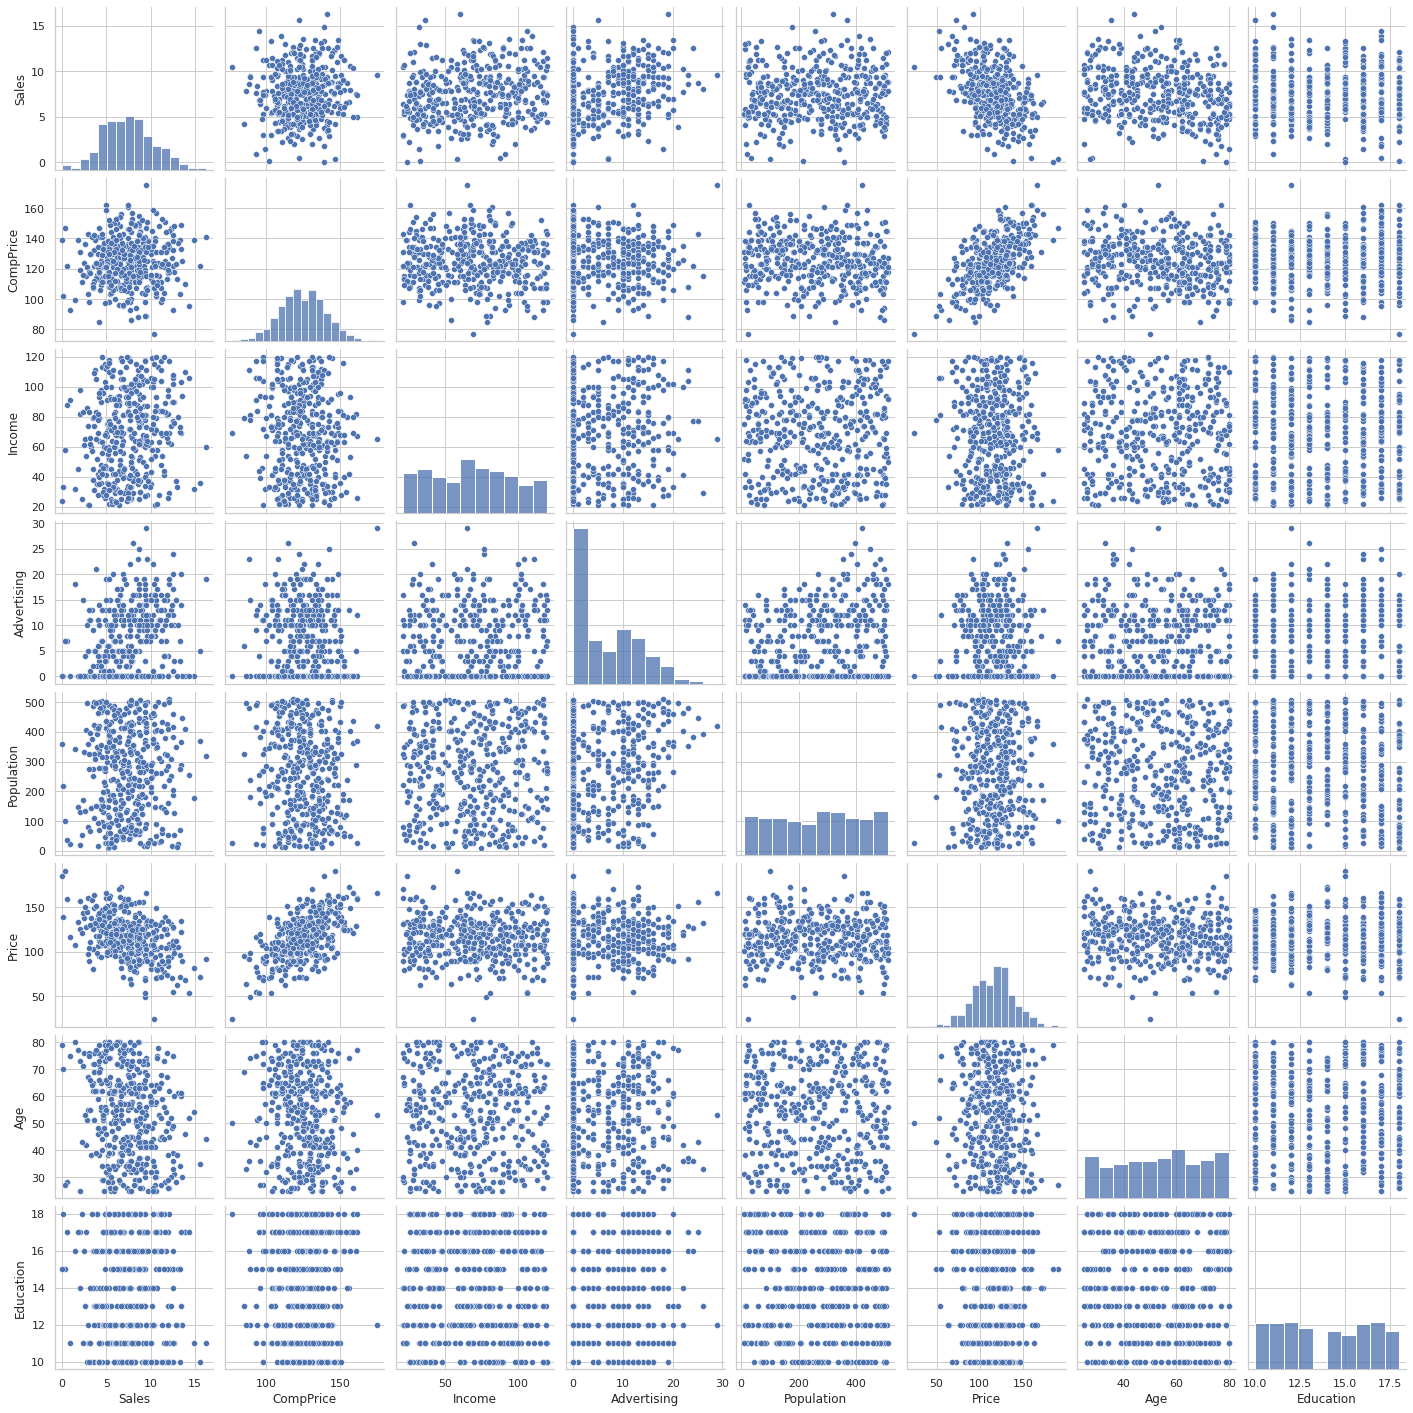

In [483]:
plt.figure(figsize=(15,8))
sns.pairplot(df3)
plt.show()

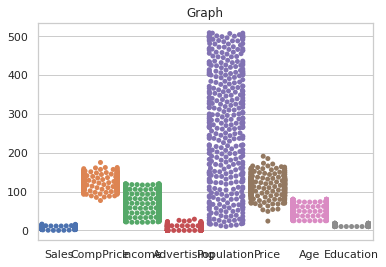

In [484]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data=df3)
 
plt.title('Graph')
 
plt.show()


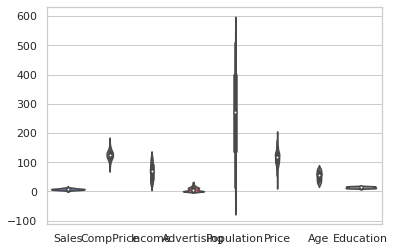

In [485]:
sns.violinplot(data=df3)

In [486]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [487]:
df3.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0    False      False   False        False       False  False      False   
1    False      False   False        False       False  False      False   
2    False      False   False        False       False  False      False   
3    False      False   False        False       False  False      False   
4    False      False   False        False       False  False      False   
..     ...        ...     ...          ...         ...    ...        ...   
395  False      False   False        False       False  False      False   
396  False      False   False        False       False  False      False   
397  False      False   False        False       False  False      False   
398  False      False   False        False       False  False      False   
399  False      False   False        False       False  False      False   

       Age  Education  Ur

In [488]:
df3.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [489]:
#EDA
encoder = ce.OrdinalEncoder(cols=["ShelveLoc", "Urban", "US"])
sales = encoder.fit_transform(df3)


In [490]:
sale_val = []
for value in df3['Sales']:
    if value <= 7.49:
        sale_val.append("low")
    else:
        sale_val.append("high")
        
sales["sale_val"]= sale_val



In [491]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [492]:
#Train test and split
x = sales.drop(['sale_val', 'Sales'],axis=1)
y = sales['sale_val']

In [493]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [494]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sale_val, Length: 400, dtype: object

Random Forest Classification

In [495]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=20 ,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)


79.75


Bagging

In [496]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=20, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model1, x, y, cv=kfold)
print(results_bag.mean()*100)

81.0


Boosting

In [497]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, x, y, cv=kfold)
print(results_boost.mean()*100)

# Splitting dataset into test and train
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state = 50)

76.5


In [498]:
from sklearn.model_selection import GridSearchCV

In [499]:
## Configuring parameters and values for searched
tuned_parameters = [{'criterion': ['gini', 'entropy'],'max_depth': [10, 20],
                     'n_estimators': [10,20],
                     'max_features': ['sqrt', 0.3]}]
                     
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                   tuned_parameters,
                   cv=7,
                   scoring='roc_auc')
## Fitting the training set
clf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20], 'max_features': ['sqrt', 0.3],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [500]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.3,
                       n_estimators=20)

In [501]:
clf.best_score_

0.8845304355508438

In [502]:
kfold = KFold(10)
accuracy = []
for i in range (1,201):
    forest = RandomForestClassifier(random_state = 42, n_estimators = i)
    result = cross_val_score(forest,x,y,cv = kfold)
    accuracy.append(np.mean(result))
accuracy

[0.665,
 0.6775,
 0.7125,
 0.705,
 0.7300000000000001,
 0.7525000000000001,
 0.7549999999999999,
 0.7474999999999999,
 0.76,
 0.765,
 0.7699999999999999,
 0.77,
 0.78,
 0.79,
 0.785,
 0.7924999999999999,
 0.7825,
 0.7874999999999999,
 0.7775000000000001,
 0.7874999999999999,
 0.7775000000000001,
 0.7975000000000001,
 0.7899999999999999,
 0.795,
 0.785,
 0.8074999999999999,
 0.8,
 0.8125,
 0.8099999999999999,
 0.8150000000000001,
 0.8099999999999999,
 0.8099999999999999,
 0.8150000000000001,
 0.8125,
 0.8099999999999999,
 0.8150000000000001,
 0.8150000000000001,
 0.8099999999999999,
 0.8099999999999999,
 0.8150000000000001,
 0.8125,
 0.8175000000000001,
 0.8174999999999999,
 0.825,
 0.82,
 0.8275,
 0.8225,
 0.82,
 0.8200000000000001,
 0.8225,
 0.8175000000000001,
 0.8275,
 0.8174999999999999,
 0.82,
 0.8174999999999999,
 0.8225,
 0.82,
 0.825,
 0.8275,
 0.8324999999999999,
 0.8324999999999999,
 0.8324999999999999,
 0.8225,
 0.825,
 0.82,
 0.82,
 0.8174999999999999,
 0.8174999999999999,


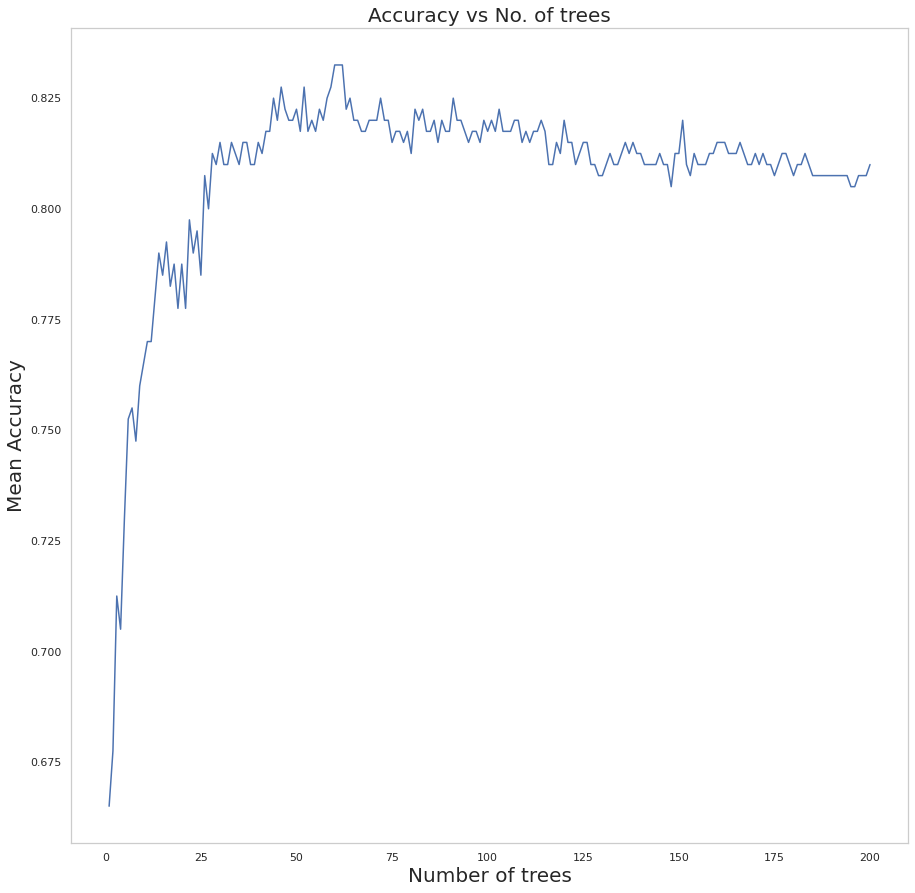

In [503]:
plt.figure(figsize = (15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel('Number of trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Accuracy vs No. of trees', fontsize = 20)
plt.grid()
plt.show()

In [504]:
n = accuracy.index(max(accuracy))
n

59

In [505]:
fors = RandomForestClassifier(n_estimators = n, random_state = 42)
fors.fit(X_train, y_train)

RandomForestClassifier(n_estimators=59, random_state=42)

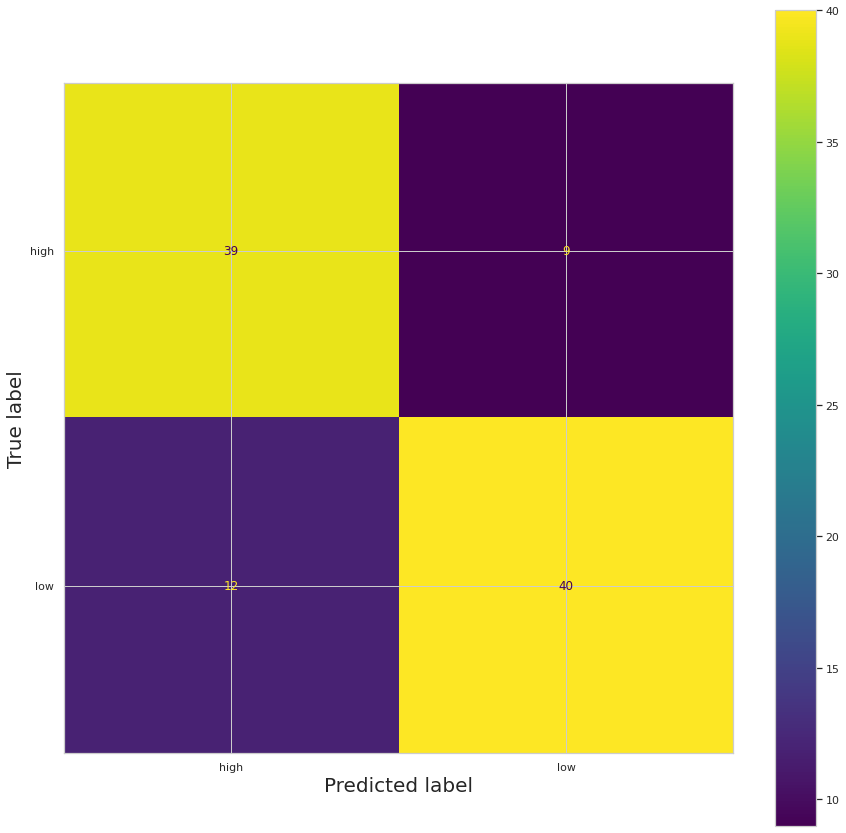

In [506]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(fors, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted label', fontsize = 20)
ax.set_ylabel('True label', fontsize = 20)
plt.show()

In [507]:
n_trees=30
m_f='sqrt'
clf_RF = RandomForestClassifier(n_estimators=n_trees, max_features=m_f,max_depth=10)
clf_RF.fit(X_train,y_train)
results = cross_val_score(clf_RF,x, y, cv=10)
print(results.mean())

0.785
